<a href="https://colab.research.google.com/github/aved991/-common-_ML_techniques/blob/main/CustomerSegmentation_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Segmentation using K-Means Project**

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **Loading Data set**

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/aved991/customer_segmentation---Unsupervised-Machine-Learning/refs/heads/main/data%20set/Mall_Customers(K-Means%20algo).csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
df.rename(columns={'Annual Income (k$)':'Annual_Income(k$)'}, inplace=True)
df

,CustomerID,Gender,Age,Annual_Income(k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [4]:
df.shape

(200, 5)

# **Descriptive Analysis**

In [5]:
df.describe()

,CustomerID,Age,Annual_Income(k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
df.dtypes

,0
CustomerID,int64
Gender,object
Age,int64
Annual_Income(k$),int64
Spending Score (1-100),int64


In [8]:
df.isnull().sum()

,0
CustomerID,0
Gender,0
Age,0
Annual_Income(k$),0
Spending Score (1-100),0


# **Filtering Data set**

In [9]:
df.drop(['CustomerID'], axis=1,inplace=True)

In [11]:
df.head()

,Gender,Age,Annual_Income(k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


# **Data Visualization**

## **Age Distribution of Customers**

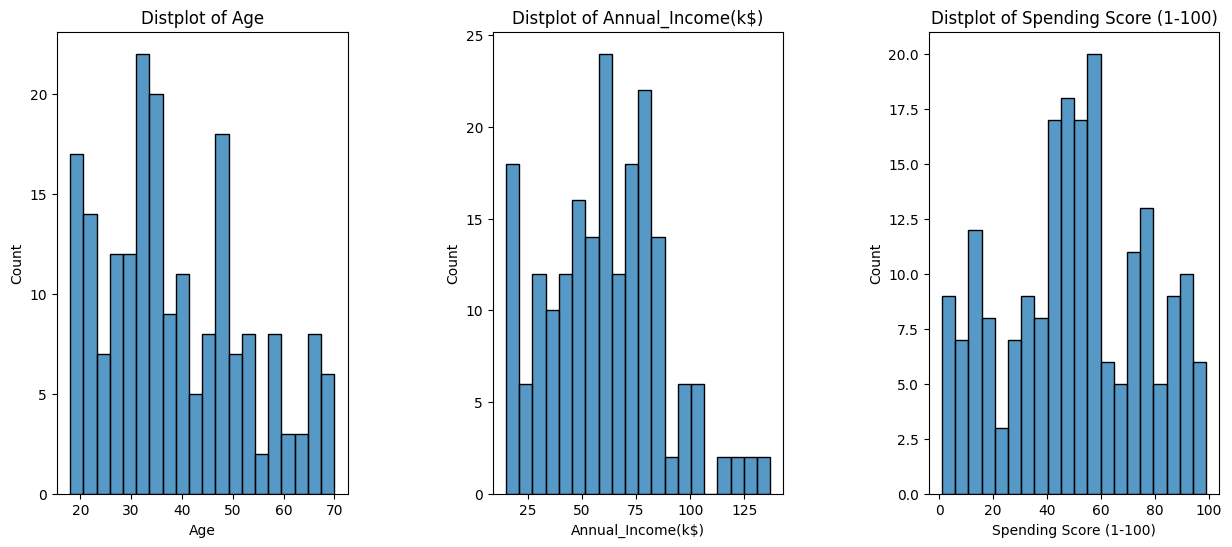

In [29]:

plt.figure(1,figsize=(15,6))
n=0
for x in ['Age', 'Annual_Income(k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)

    sns.histplot(df[x], bins = 20)
    plt.title('Distplot of {}'.format(x))

plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.show()

##  **Gender Distribution**

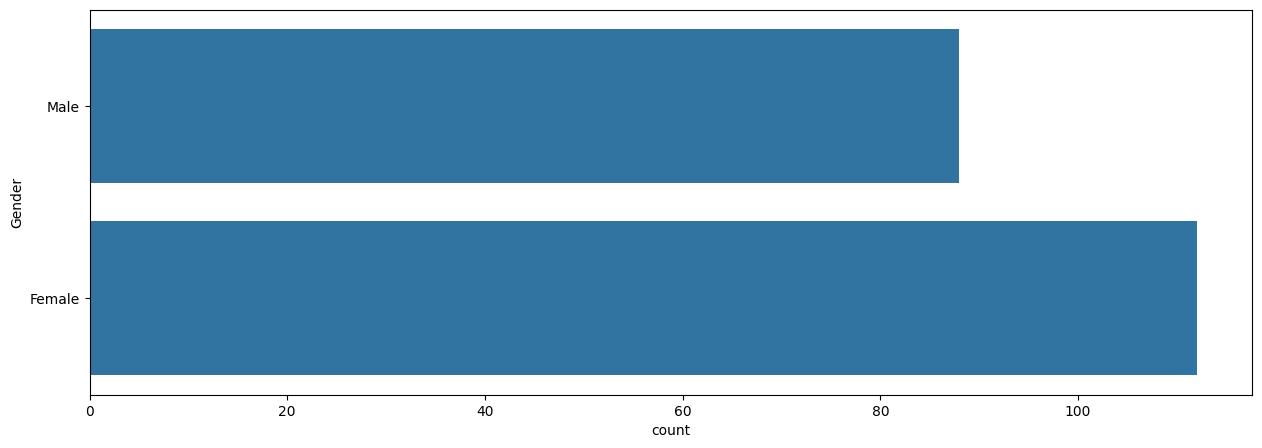

In [31]:
plt.figure(figsize=(15,5))
sns.countplot(y="Gender", data=df)
plt.show()

## **Violin Plot**

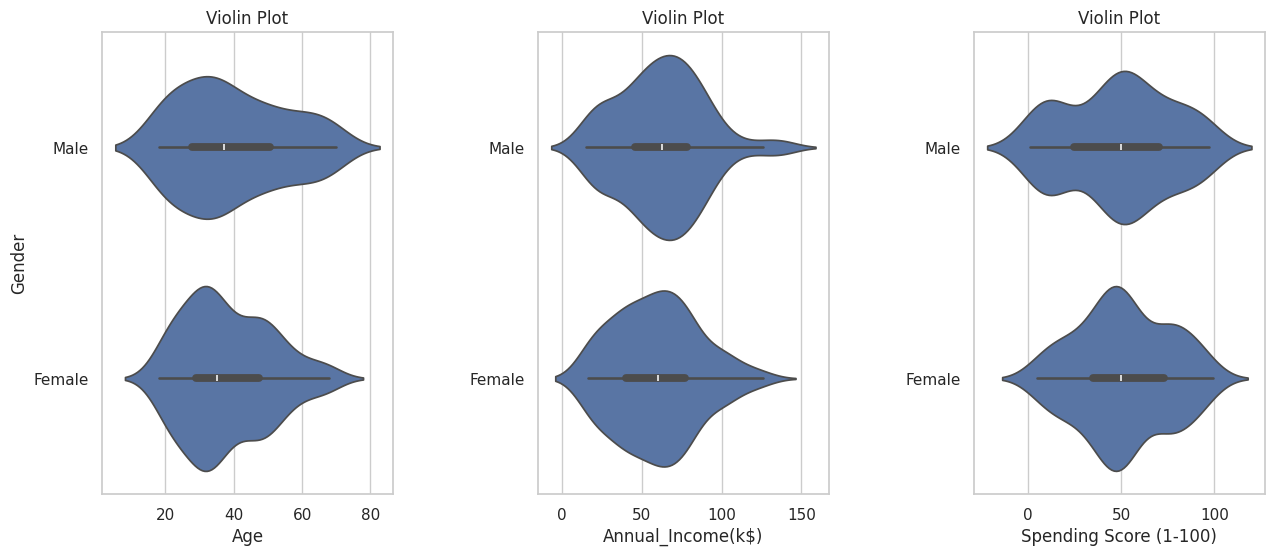

In [35]:
plt.figure(1,figsize=(15,6))
n=0
for cols in ['Age', 'Annual_Income(k$)', 'Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    sns.set(style='whitegrid')
    plt.subplots_adjust(hspace=0.5, wspace=0.5)
    sns.violinplot(x= cols,y='Gender', data=df)
    plt.ylabel('Gender' if n==1 else '')
    plt.title('Violin Plot')

plt.show()

## **Number of Customers & Age**

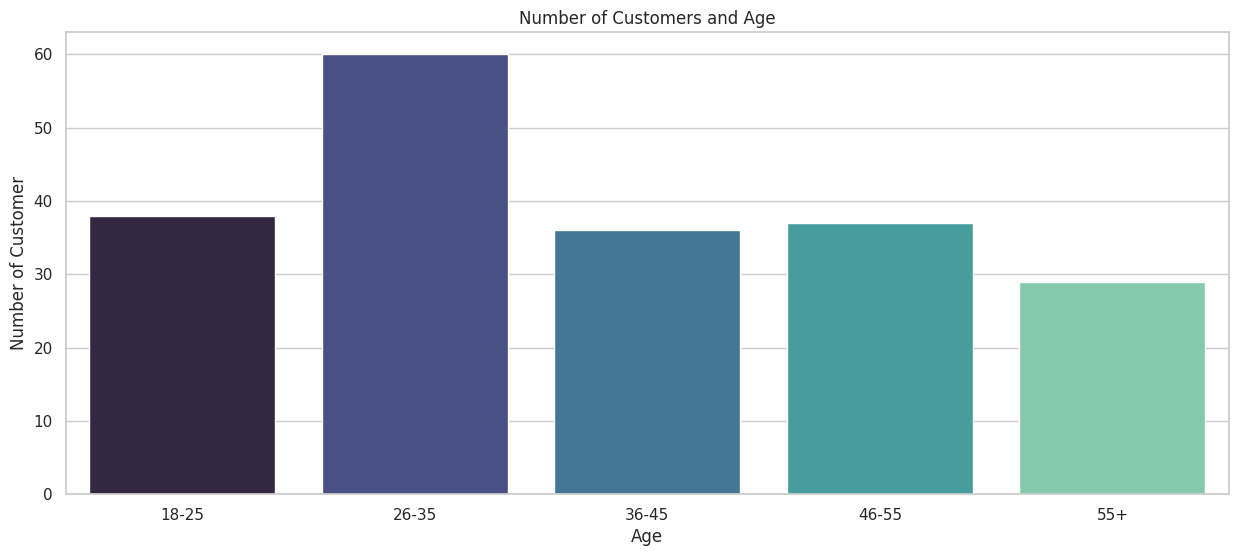

In [40]:
age_18_25= df.Age[(df.Age>=18) & (df.Age<=25)]
age_26_35= df.Age[(df.Age>=26) & (df.Age<=35)]
age_36_45= df.Age[(df.Age>=36) & (df.Age<=45)]
age_46_55= df.Age[(df.Age>=46) & (df.Age<=55)]
age_55above= df.Age[df.Age >=56]

age_x=["18-25",'26-35', '36-45', '46-55', '55+']
age_y=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values), len(age_55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=age_x, y=age_y, hue=age_x, palette='mako')

plt.title('Number of Customers and Age')
plt.ylabel('Number of Customer')
plt.xlabel('Age')

plt.show()

